In [1]:
import numpy as np
import math

In [2]:
import matplotlib.pyplot as plt

In [3]:
m = 500
n = 400
A = np.random.random(size=(m, n)) # A: m x n

In [4]:
def gradient_descent(A, alpha=0.01, beta=0.5):
    def f(X, A):
        return -np.sum(np.log(1 - A @ X)) - np.sum(np.log(1 - X ** 2))
    
    def gradient(X, A):
        return A.T @ (1 / (1 - A @ X)) + 2 * X / (1 - X ** 2)
    
    X = np.zeros((n, 1)) # X: n vector
    term_cond = 1e-5 # stopping criterion
    
    vals = []
    steps = []
    
    for _ in range(1000):
        val = f(X, A)
        grad = gradient(X, A)
        vals.append(val)
        if np.linalg.norm(grad) < term_cond: break
        
        # start backtracking line search
        t = 1
        # guarantee that log is valid
        while np.any(A @ (X + t*(-grad)) >= 1) or np.any(np.abs(X + t*(-grad)) >= 1):
            t *= beta
        while f(X + t*(-grad), A) > f(X, A) + alpha * t * grad.T @ (-grad):
            t *= beta
        # update X
        X = X + t * (-grad)
        steps.append(t)
    
    return vals, steps

In [5]:
vals, steps = gradient_descent(A, 0.01, 0.5)

In [6]:
fx = vals[:-1]
opt_val = vals[-1]

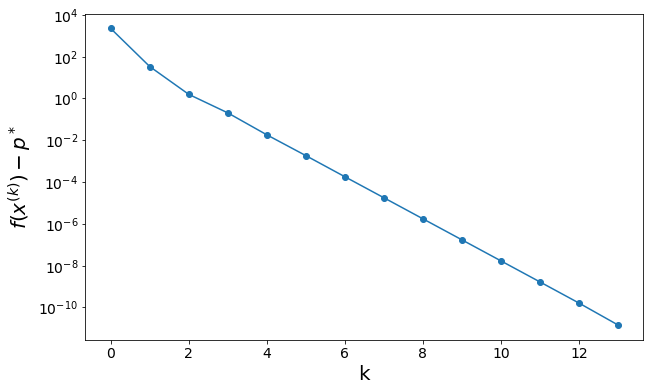

In [7]:
plt.figure(figsize=(10, 6))
plt.yscale("log")
plt.ylabel("$f(x^{(k)}) - p^*$", size=20)
plt.yticks(fontsize=14)
plt.xlabel("k", size=20)
plt.xticks(fontsize=14)
plt.plot([i for i in range(len(fx))], fx-opt_val, 'o-')
plt.savefig("9-30-a-1.png")

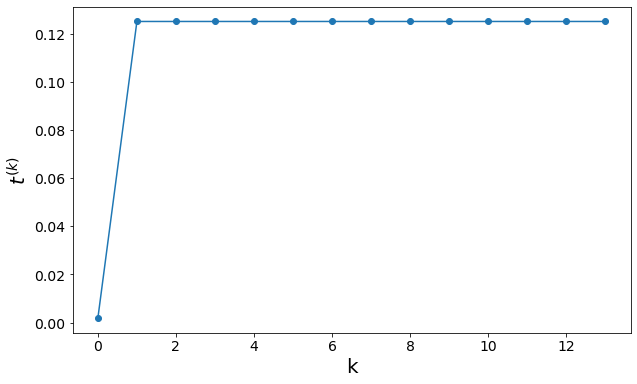

In [8]:
plt.figure(figsize=(10, 6))
#plt.yscale("log")
plt.ylabel("$t^{(k)}$", size=20)
plt.yticks(fontsize=14)
plt.xlabel("k", size=20)
plt.xticks(fontsize=14)
plt.plot([i for i in range(len(steps))], steps, 'o-')
plt.savefig("9-30-a-2.png")

In [9]:
def newtons_method(A, alpha=0.01, beta=0.5):
    def f(X, A):
        return -np.sum(np.log(1 - A @ X)) - np.sum(np.log(1 - X ** 2))
    
    def gradient(X, A):
        return A.T @ (1 / (1 - A @ X)) + 2 * X / (1 - X ** 2)
    
    def hessian(X, A):
        return A.T @ np.diag((1 / (1 - A @ X)**2).T[0]) @ A + np.diag((2 * (1+X**2) / (1 - X**2)**2).T[0])
    
    
    X = np.zeros((n, 1)) # X: n vector
    term_cond = 1e-8 # stopping criterion
    
    vals = []
    steps = []
    
    for _ in range(1000):
        val = f(X, A)
        grad = gradient(X, A)
        hess = hessian(X, A)
        vals.append(val)
        v = np.linalg.solve(-hess, grad)
        
        if np.abs(grad.T @ v) < term_cond: break
        
        # start backtracking line search
        t = 1
        # guarantee that log is valid
        while np.any(A @ (X + t*v) >= 1) or np.any(np.abs(X + t*v) >= 1):
            t *= beta
        while f(X + t*v, A) > f(X, A) + alpha * t * grad.T @ v:
            t *= beta
        # update X
        X = X + t * v
        steps.append(t)
    
    return vals, steps

In [10]:
vals, steps = newtons_method(A, 0.01, 0.5)

In [11]:
fx = vals[:-1]
opt_val = vals[-1]

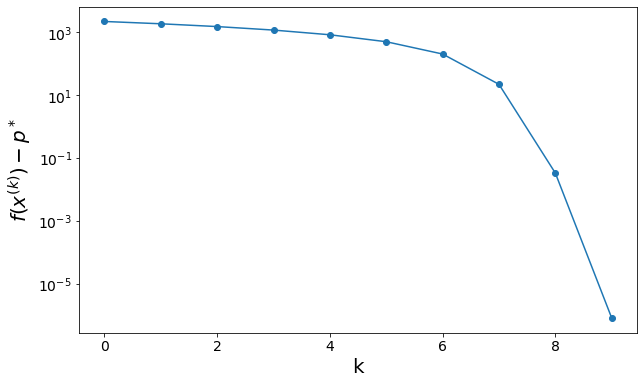

In [12]:
plt.figure(figsize=(10, 6))
plt.yscale("log")
plt.ylabel("$f(x^{(k)}) - p^*$", size=20)
plt.yticks(fontsize=14)
plt.xlabel("k", size=20)
plt.xticks(fontsize=14)
plt.plot([i for i in range(len(fx))], fx-opt_val, 'o-')
plt.savefig("9-30-b-1.png")

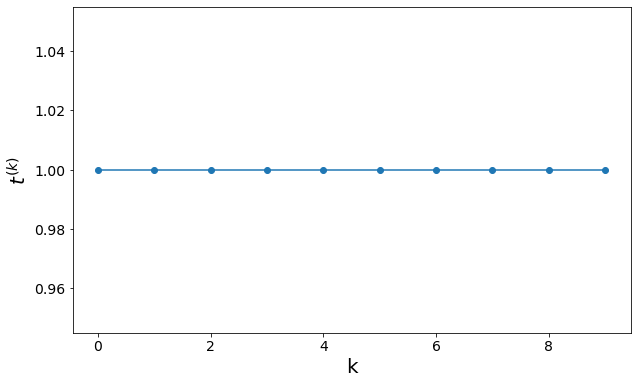

In [13]:
plt.figure(figsize=(10, 6))
#plt.yscale("log")
plt.ylabel("$t^{(k)}$", size=20)
plt.yticks(fontsize=14)
plt.xlabel("k", size=20)
plt.xticks(fontsize=14)
plt.plot([i for i in range(len(steps))], steps, 'o-')
plt.savefig("9-30-b-2.png")

In [14]:
A = np.random.random((30, 100))
p, n = A.shape
X = np.random.random((n, 1))

In [15]:
def standard_newton(A, X, alpha=0.01, beta=0.5, stop=1e-8):
    def KKT(A, grad, hess):
        p, n = A.shape
        mat = np.zeros((p+n, p+n))
        mat[:n, :n] += hess # top-left
        mat[:n, n:] += A.T # top-right
        mat[n:, :n] += A # bot-left
        vec = np.zeros((p+n, 1))
        vec[:n, :] += grad
        return mat, vec
    
    p, n = A.shape
    
    vals = []
    for i in range(1000):
        val = X.T @ np.log(X)
        vals.append(val)
        grad = 1 + np.log(X)
        hess = np.diag((1 / X).T[0])
        # construct KKT system
        mat, vec = KKT(A, grad, hess)
        sol = -np.linalg.solve(mat, vec)
        v = sol[:n, :]
        
        if np.abs(grad.T @ v) < stop: break
        
        t = 1
        while np.any((X + t*v) <= 0):
            t *= beta
        while (X + t*v).T @ np.log(X + t*v) >= val + t * alpha * grad.T @ v:
            t *= beta
        X = X + t*v

    return np.array(vals).flatten()

In [16]:
vals = standard_newton(A, X)

In [17]:
fx = vals[:-1]
opt_val = vals[-1]

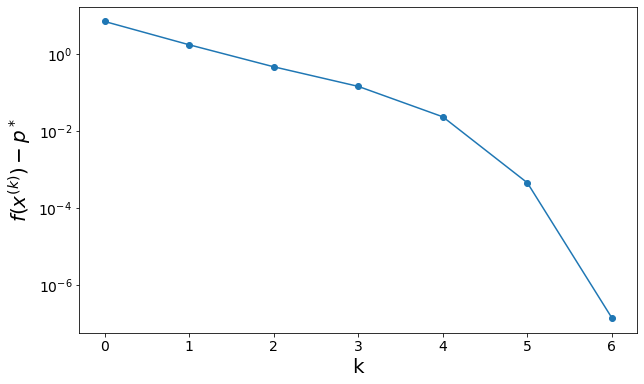

In [18]:
plt.figure(figsize=(10, 6))
plt.yscale("log")
plt.ylabel("$f(x^{(k)}) - p^*$", size=20)
plt.yticks(fontsize=14)
plt.xlabel("k", size=20)
plt.xticks(range(len(vals)), fontsize=14)
plt.plot([i for i in range(len(fx))], fx-opt_val, 'o-')
plt.savefig("10-15-a.png")

In [19]:
def infeasible_start(A, X, alpha=0.01, beta=0.5, stop=1e-8):
    def r(A, X, nu, b):
        return np.vstack((1 + np.log(X) + A.T @ nu, A @ X - b))
    
    def infeasible_KKT(A, X, hess, nu, b):
        p, n = A.shape
        mat = np.vstack((np.hstack((hess, A.T)), np.hstack((A, np.zeros((p, p))))))
        vec_r = r(A, X, nu, b)
        resi = np.linalg.norm(vec_r)
        return mat, vec_r, resi
    
    p, n = A.shape
    nu = np.zeros((p, 1))
    b = np.random.random((p, 1)) # Ax != b
    
    residuals = []
    
    for i in range(100):
        hess = np.diag((1 / X).T[0])
        mat, vec_r, residual = infeasible_KKT(A, X, hess, nu, b)
        residuals.append(residual)
        sol = -np.linalg.solve(mat, vec_r)
        Dx = sol[:n, :]
        Dnu = sol[n:, :]
        
        if residual < stop: break
        
        t = 1
        while np.any((X + t*Dx) <= 0):
            t *= beta
        
        while np.linalg.norm(r(A, X+t*Dx, nu+t*Dnu, b)) > (1-alpha*t)*residual:
            t *= beta
        X = X + t*Dx
        nu = nu + t*Dnu

    return np.array(residuals).flatten()

In [20]:
p, n = A.shape
X = np.random.random((n, 1))
X2 = np.ones((n, 1))
res1 = infeasible_start(A, X)
res2 = infeasible_start(A, X2)

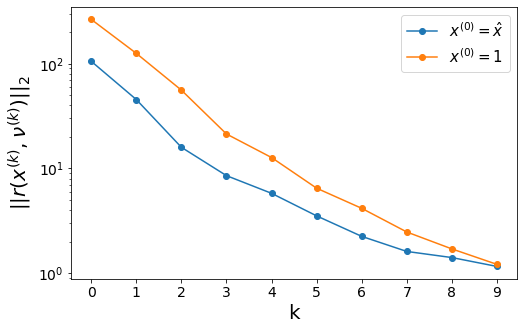

In [21]:
plt.figure(figsize=(8, 5))

plt.ylabel(r"$||r(x^{(k)}, \nu^{(k)})||_2$", size=20)
plt.yticks(fontsize=14)
plt.xlabel("k", size=20)
plt.xticks(range(len(res1[:10])), fontsize=14)
plt.yscale("log")
plt.plot(range(10), res1[:10]-res1[-1], 'o-', label=r"$x^{(0)} = \hat{x}$")
plt.plot(range(10), res2[:10]-res2[-1], 'o-', label=r"$x^{(0)} = 1$")
plt.legend(fontsize=15)
plt.savefig("10-15-b.png")

In [22]:
def dual_newton(A, X, alpha=0.01, beta=0.5, stop=1e-8):
    def f(A, nu, b):
        return b.T @ nu + np.sum(np.exp(-A.T @ nu - 1))
    
    def gradient(A, nu, b):
        return b - A @ np.exp(-A.T @ nu - 1)
    
    def hessian(A, nu):
        return A * np.diag(np.exp(-A.T @ nu - 1)) @ A.T
    
    p, n = A.shape
    nu = np.zeros((p, 1))
    b = A @ X
    
    vals = []
    
    for _ in range(100):
        val = f(A, nu, b)
        vals.append(val)
        grad = gradient(A, nu, b)
        hess = hessian(A, nu)
        v = -np.linalg.solve(hess, grad)
        
        if np.abs(grad.T @ v) < stop: break
        
        t = 1
        while f(A, nu+t*v, b) > f(A, nu, b) + t*alpha*grad.T @ v:
            t *= beta
        nu = nu + t*v
    return np.array(vals).flatten()

In [23]:
vals = dual_newton(A, X)

In [24]:
fx = vals[:-1]
opt_val = vals[-1]

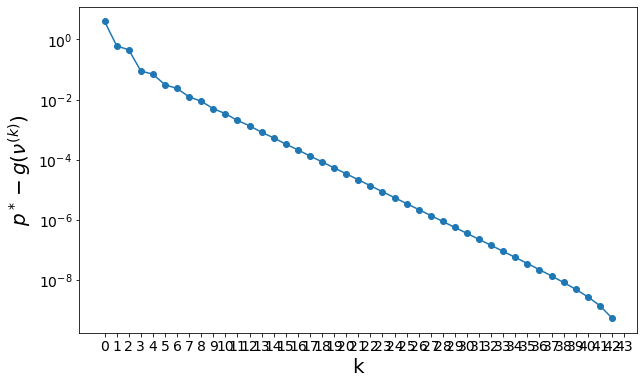

In [25]:
plt.figure(figsize=(10, 6))
plt.yscale("log")
plt.ylabel(r"$p^* - g(\nu^{(k)})$", size=20)
plt.yticks(fontsize=14)
plt.xlabel("k", size=20)
plt.xticks(range(len(vals)), fontsize=14)
plt.plot([i for i in range(len(fx))], np.abs(opt_val-fx), 'o-')
plt.savefig("10-15-c.png")

In [41]:
A = np.array([[0, -1], [2, -4], [2, 1], [-4, 4], [-4, 0]])

In [160]:
def max_vol(A, b=1, alpha=0.01, beta=0.5, newton_stop=1e-8, gap_stop=1e-3):
    def f(t, u, l, y):
        return -t * np.sum(np.log(u-l)) - np.sum(np.log(y))
    
    def gradient(Ap, Am, u, l, y, t):
        grad = t*np.vstack((1/(u-l), -1/(u-l))) + np.vstack((-Am.T, Ap.T)) @ (1 / y)
        return grad
    
    def hessian(Ap, Am, u, l, y, t):
        diag = np.diag((1/(u-l)**2).T[0])
        return t*np.vstack((np.hstack((diag, -diag)), np.hstack((-diag, diag)))) + \
               np.vstack((-Am.T, Ap.T)) @ np.diag((1/y**2).T[0]) @ np.hstack((-Am, Ap))
    
    mu = 20
    m, n = A.shape
    Ap = np.maximum(A, np.zeros(A.shape)) # A^+ = max(A, 0)
    Am = np.maximum(-A, np.zeros(A.shape)) # A^- = max(-A, 0)
    r = np.max(Ap @ np.ones((n, 1)) + Am @ np.ones((n, 1)))
    l = -1 / (2*r) * np.ones((n, 1))
    u = 1 / (2*r) * np.ones((n, 1))
    t = 1
    
    vals = []
    for i in range(100):
        y = b + Am @ l - Ap @ u
        val = f(t, u, l, y)
        grad = gradient(Ap, Am, u, l, y, t)
        hess = hessian(Ap, Am, u, l, y, t)
        v = -np.linalg.solve(hess, grad)
        
        if np.abs(grad.T @ v) < newton_stop:
            gap = 2*m / t
            if gap < gap_stop: break
            t *= mu
        else:
            dl = v[:n, :]
            du = v[n:, :]
            dy = Am @ dl - Ap @ du
            tls = 1
            while np.min(np.vstack((u-l+tls*(du-dl), y+tls*dy))) <= 0:
                tls *= beta
            while f(t, u+tls*du, l+tls*dl, y+tls*dy) >= f(t, u, l, y) + tls*alpha*grad.T @ v:
                tls *= beta
            l = l + tls*dl
            u = u + tls*du
    return u, l

In [161]:
u, l = max_vol(A)

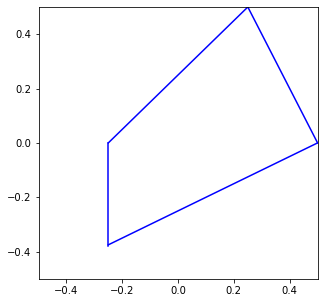

In [147]:
x1 = np.linspace(-0.38, 0)
x2 = np.linspace(-0.25, 0.5)
x3 = np.linspace(-0.5, 0.5)
x4 = np.linspace(-0.25, 0.5)

plt.figure(figsize=(5, 5))
plt.xlim((-0.5, 0.5))
plt.ylim((-0.5, 0.5))

plt.plot([-1/4]*len(x1), x1, 'b')
plt.plot(x2, (2*x2-1)/4, 'b')
plt.plot(x3, 1-2*x3, 'b')
plt.plot(x4, (1+4*x4)/4, 'b')

plt.savefig("11-12-1.png")

In [197]:
print("u: \n", u)
print("l: \n", l)

u: 
 [[0.37499534]
 [0.2499976 ]]
l: 
 [[-5.20291015e-08]
 [-6.25003776e-02]]


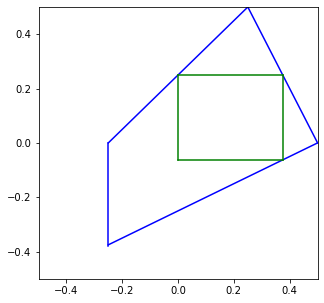

In [208]:
x = np.linspace(-0.5, 0.5)

plt.figure(figsize=(5, 5))
plt.xlim((-0.5, 0.5))
plt.ylim((-0.5, 0.5))

plt.plot([-1/4]*len(x1), x1, 'b')
plt.plot(x2, (2*x2-1)/4, 'b')
plt.plot(x3, 1-2*x3, 'b')
plt.plot(x4, (1+4*x4)/4, 'b')

z1 = np.linspace(l[0], u[0])
z2 = np.linspace(l[1], u[1])

plt.plot(z1, [l[1]]*len(z1), 'g')
plt.plot(z1, [u[1]]*len(z1), 'g')
plt.plot([u[0]]*len(z2), z2, 'g')
plt.plot([l[0]]*len(z2), z2, 'g')

plt.savefig("11-12-2.png")